### Deviation vs. Variance

In [6]:
import numpy as np

n = 10
a = np.random.random(n)
print((1/n)*((a-a.mean())**2).sum())
print((1/(n-1))*((a-a.mean())**2).sum())

0.10726249747250563
0.11918055274722847


In [7]:
n = 10000
a = np.random.random(n)
print((1/n)*((a-a.mean())**2).sum())
print((1/(n-1))*((a-a.mean())**2).sum())

0.08316790920949715
0.08317622683218037


### Peason Corelation

In [1]:
import numpy as np

def peason(x,y):
    exy = (x*y).mean()
    ex = x.mean()
    ey = y.mean()
    ex2 = x.mean()**2
    exx = (x*x).mean()
    ey2 = y.mean()**2
    eyy = (y*y).mean()
    return (exy - ex*ey) / (np.sqrt(exx-ex2)*np.sqrt(eyy-ey2))

np.random.seed(8675309)
N = 100
x = np.linspace(0,1,N) + (np.random.random(N) - 0.5)
y = np.random.random(N) * x
z = -0.1*np.random.random(N)*x

In [2]:
peason(x,y)

np.float64(0.6828516550443247)

In [3]:
peason(x,z)

np.float64(-0.8504746770227909)

In [4]:
peason(y,z)

np.float64(-0.5653610370701883)

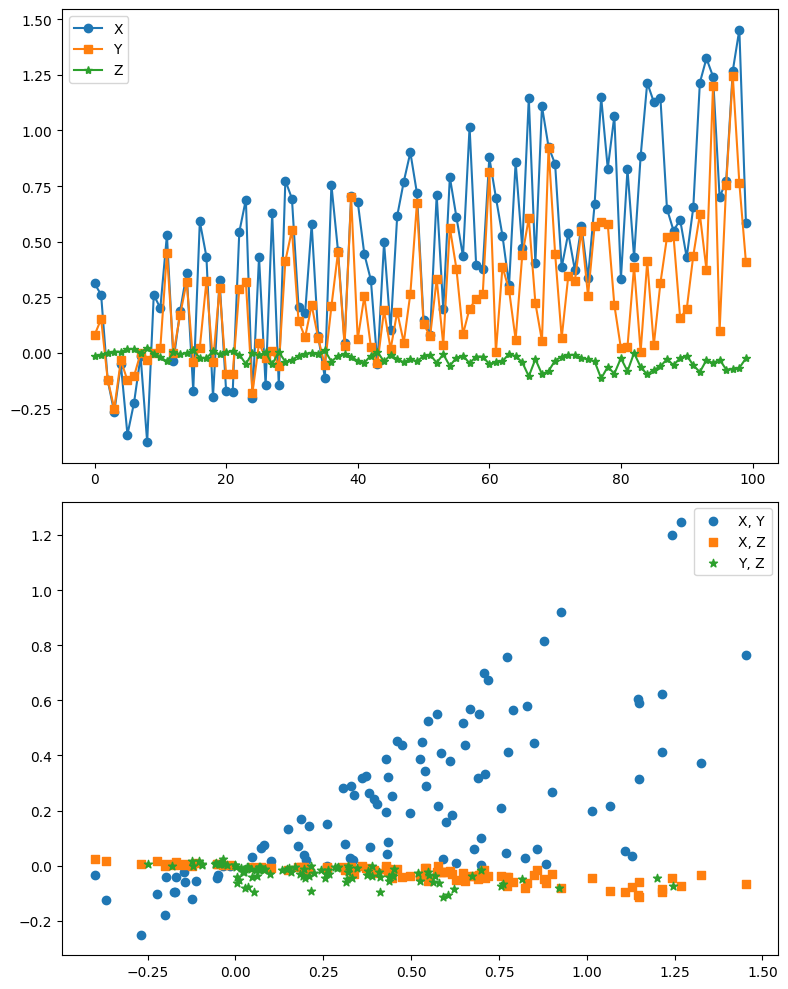

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.plot(x, 'o-', label='X')
plt.plot(y, 's-', label='Y')
plt.plot(z, '*-', label='Z')
plt.legend()

plt.subplot(2,1,2)
plt.scatter(x, y, marker='o', label='X, Y')
plt.scatter(x, z, marker='s', label='X, Z')
plt.scatter(y, z, marker='*', label='Y, Z')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
d = np.vstack((x, y, z))
np.corrcoef(d)

array([[ 1.        ,  0.68285166, -0.85047468],
       [ 0.68285166,  1.        , -0.56536104],
       [-0.85047468, -0.56536104,  1.        ]])

In [8]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')
a = china[230,:,1].astype("float64")
b = china[231,:,1].astype("float64")
c = china[400,:,1].astype("float64")
d = np.random.random(640)

peason(a,b)

np.float64(0.8979294733086834)

In [9]:
peason(a,c)

np.float64(-0.2760642212905016)

In [10]:
peason(a,d)

np.float64(-0.06717013501571907)

### Spearman Correlation

In [14]:
import numpy as np

def spearman(x, y):
    n = len(x)
    t = x[np.argsort(x)]
    rx = []
    for i in range(n):
        rx.append(np.where(x[i]==t)[0][0])
    rx = np.array(rx,dtype="float64")
    t = y[np.argsort(y)]
    
    ry = []
    for i in range(n):
        ry.append(np.where(y[i] == t)[0][0])
    ry = np.array(ry, dtype="float64")
    d = rx - ry
    return 1.0 - (6.0/(n*(n*n-1)))*(d**2).sum()

In [18]:
x = np.linspace(0,1,N) + (np.random.random(N) - 0.5)
y = np.random.random(N) * x
z = -0.1*np.random.random(N)*x
spearman(x, y)

np.float64(0.8096729672967297)

In [20]:
from scipy.stats import spearmanr

print(spearmanr(x, y), spearmanr(x, y)[0])
print(spearmanr(x, z), spearmanr(x, z)[0])
print(spearmanr(y, z), spearmanr(y, z)[0])


SignificanceResult(statistic=np.float64(0.8096729672967297), pvalue=np.float64(2.053924843740787e-24)) 0.8096729672967297
SignificanceResult(statistic=np.float64(-0.8203060306030603), pvalue=np.float64(1.6157502362762446e-25)) -0.8203060306030603
SignificanceResult(statistic=np.float64(-0.6070807080708069), pvalue=np.float64(2.145513530263916e-11)) -0.6070807080708069


In [21]:
ramp = np.linspace(-20, 20, 1000)
sig = 1.0 / (1.0 + np.exp(-ramp))
print(peason(ramp, sig))
print(spearman(ramp, sig))

0.9053277293366915
1.0


### Hypothesis testing

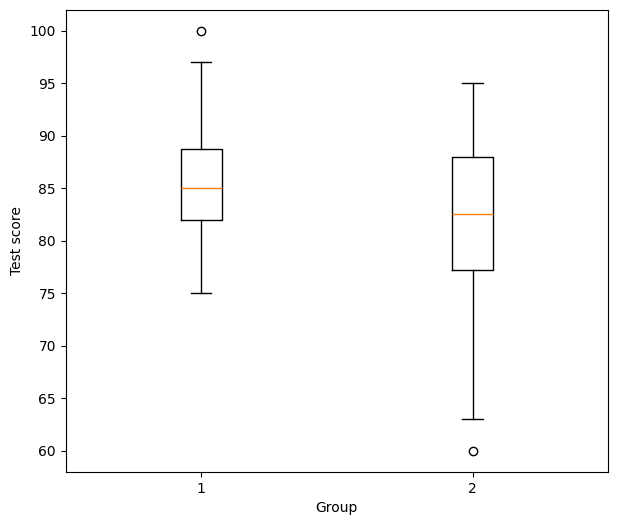

In [22]:
import numpy as np
import matplotlib.pyplot as plt

group1 = np.array([
    81, 80, 85, 87, 83, 87, 87, 90, 79, 83, 88, 75, 87, 92, 78, 80,
    83, 91, 82, 88, 89, 92, 97, 82, 79, 82, 82, 85, 89, 91, 83, 85,
    77, 81, 90, 87, 82, 84, 86, 79, 84, 85, 90, 84, 90, 85, 85, 78,
    94, 100
])

group2 = np.array([
    92, 82, 78, 74, 86, 69, 83, 67, 85, 82, 81, 91, 79, 82, 82, 88,
    80, 63, 85, 86, 77, 94, 85, 75, 77, 89, 86, 71, 82, 82, 80, 88,
    72, 91, 90, 92, 95, 87, 71, 83, 94, 90, 78, 60, 76, 88, 91, 83,
    85, 73
])


plt.figure(figsize=(7, 6))
plt.boxplot(
    [group1, group2],
    label=["Group 1", "Group 2"],
    showmeans=False
)

plt.xlabel('Group')
plt.ylabel("Test score")
plt.show()